In [127]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_trial_data,mouse_drug_data, how="outer", on=["Mouse ID"])

# Sorting the dataframe by mouse ID and tumor volume
clinical_data_complete = clinical_data_complete.sort_values(["Timepoint", "Tumor Volume (mm3)" ], ascending=True)

# Resetting the index

clinical_data_complete = clinical_data_complete.reset_index(drop = True)

# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [128]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

# Selecting the columns for the plots: Timepoint, Tumor Volume (mm3), Metastatic sites and Drug

tumor_response =clinical_data_complete[["Timepoint", "Tumor Volume (mm3)","Metastatic Sites","Drug"]]

# Group by Drug and Time point and get the average volume of the tumors
tumor_response = pd.DataFrame(clinical_data_complete.groupby(["Drug", "Timepoint"]) ["Tumor Volume (mm3)"].mean())


# Convert to DataFrame

tumor_response_index = tumor_response.reset_index(drop = False)

# Preview DataFrame

tumor_response_index.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [129]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Group by Drug and Time point and get the standard error for tumor volume

tumor_error = pd.DataFrame(clinical_data_complete.groupby(["Drug", "Timepoint"]) ["Tumor Volume (mm3)"].sem())

#Convert to DataFrame

tumor_error_index = tumor_error.reset_index(drop = False)

# Preview DataFrame

tumor_error_index.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [130]:
# Minor Data Munging to Re-Format the Data Frames: tumor average size by timperiod and drug

plot_table = tumor_response_index.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview DataFrame

plot_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [131]:
# Reset index to pivot table for tumor volume

plot_table_index = plot_table.reset_index(drop = False)

time =plot_table_index["Timepoint"]

plot_table_index.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [132]:
# Minor Data Munging to Re-Format the Data Frames: standard error by timepoint and drug

plot_error = tumor_error_index.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview DataFrame

plot_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [133]:
# Reset index to pivot table for standard error

plot_error_index = plot_error.reset_index(drop = False)

x = plot_error_index["Timepoint"]

plot_error_index.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


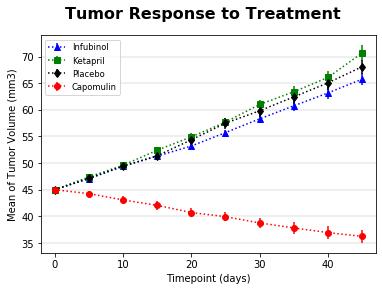

In [134]:
# Generate the Plot (with Error Bars)

fig, (ax1) = plt.subplots()

fig.suptitle("Tumor Response to Treatment", fontsize=16, fontweight="bold")

ax1.errorbar(time, plot_table_index.loc[:,"Infubinol"], marker = "^",color="blue",label="Infubinol", 
             yerr = plot_error_index.loc[:,"Infubinol"], linestyle = ":")

ax1.errorbar(time, plot_table_index.loc[:,"Ketapril"], marker = "s",color="green",label="Ketapril", 
             yerr = plot_error_index.loc[:,"Ketapril"], linestyle = ":")

ax1.errorbar(time, plot_table_index.loc[:,"Placebo"], marker = "d",color="black",label="Placebo", 
             yerr = plot_error_index.loc[:,"Placebo"], linestyle = ":")

ax1.errorbar(time, plot_table_index.loc[:,"Capomulin"], marker = "o",color="red",label="Capomulin", 
             yerr = plot_error_index.loc[:,"Capomulin"], linestyle = ":")

#ax1.errorbar(time, plot_table_index.loc[:,"Ramicane"], marker = '*',color="palegreen",label="Ramicane", 
#           yerr = plot_error_index.loc[:,"Ramicane"], linestyle = ":")

#ax1.errorbar(time, plot_table_index.loc[:,"Propriva"], marker = 'v',color="skyblue",label="Propriva", 
#             yerr = plot_error_index.loc[:,"Propriva"], linestyle = ":")

#ax1.errorbar(time, plot_table_index.loc[:,"Ceftamin"], marker = 'x',color="purple",label="Ceftamin", 
#             yerr = plot_error_index.loc[:,"Ceftamin"], linestyle = ":")

#ax1.errorbar(time, plot_table_index.loc[:,"Naftisol"], marker = 'h',color="slategrey",label="Naftisol", 
#             yerr = plot_error_index.loc[:,"Naftisol"], linestyle = ":")

#ax1.errorbar(time, plot_table_index.loc[:,"Stelasyn"], marker = '+',color="olive",label="Stelasyn", 
#             yerr = plot_error_index.loc[:,"Stelasyn"], linestyle = ":")


#ax1.errorbar(time, plot_table_index.loc[:,"Zoniferol"], marker = 8,color="aqua",label="Zoniferol", 
#             yerr = plot_error_index.loc[:,"Zoniferol"], linestyle = ":")


ax1.set_xlim(-2, max(plot_table_index["Timepoint"]+2))

ax1.set_xlabel("Timepoint (days)")

ax1.set_ylabel("Mean of Tumor Volume (mm3)")

ax1.grid(axis ='y',color='grey', linestyle='-', linewidth=0.25)

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the plot
plt.savefig("../Images/tumor_size vs. timepoint.png")

# Show plot



plt.show()

In [135]:
# Print some conclusions on the data

print("1) Tumor size trends show that there are two different effects of the treatment")
print("")
print("2) Drugs like Capomulin and Ramicane shows decreasing tumor volumes after 40 days (about 5 mm3 decrease)")
print("")
print("3) The remaining drugs do not to shrink the tumor volume/size and show a similar trend to the placebo")

1) Tumor size trends show that there are two different effects of the treatment

2) Drugs like Capomulin and Ramicane shows decreasing tumor volumes after 40 days (about 5 mm3 decrease)

3) The remaining drugs do not to shrink the tumor volume/size and show a similar trend to the placebo


## Metastatic Response to Treatment

In [136]:
# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [137]:
# Store the Mean of the Number of Metastatic Sites Data Grouped by Drug and Timepoint

# Selecting the columns for the plots: Timepoint, Metastatic sites and Drug

tumor_number =clinical_data_complete[["Timepoint","Metastatic Sites","Drug"]]

# Group by Drug and Time point and get the average volume of the number of metastatic sites

tumor_number = pd.DataFrame(tumor_number.groupby(["Drug", "Timepoint"]) ["Metastatic Sites"].mean())


# Convert to DataFrame

tumor_number_index = tumor_number.reset_index(drop = False)

# Preview DataFrame

tumor_number_index.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [138]:
# Store the Standard Error of Number of Metastatic Sites Grouped by Drug and Timepoint

# Group by Drug and Time point and get the standard error for tumor volume

number_error = pd.DataFrame(clinical_data_complete.groupby(["Drug", "Timepoint"]) ["Metastatic Sites"].sem())

#Convert to DataFrame

number_error_index = number_error.reset_index(drop = False)

# Preview DataFrame

number_error_index.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [139]:
# Minor Data Munging to Re-Format the Data Frames: number of metastatic sites by timperiod and drug

plot_number = tumor_number_index.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview DataFrame

plot_number

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [140]:
# Reset index to pivot table for number of metastatic sites

plot_number_index = plot_number.reset_index(drop = False)

time =plot_number_index["Timepoint"]

plot_number_index.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [141]:
# Minor Data Munging to Re-Format the Data Frames: standard error by timepoint and drug

number_error = number_error_index.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview DataFrame

number_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [142]:
# Reset index to pivot table for number of metastatic sites

number_error_index = number_error.reset_index(drop = False)

time =number_error_index["Timepoint"]

number_error_index.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


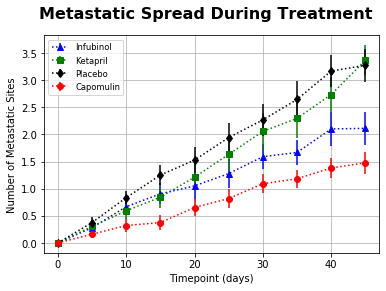

In [143]:
# Generate the Plot (with Error Bars)

fig, (ax2) = plt.subplots()

fig.suptitle("Metastatic Spread During Treatment", fontsize=16, fontweight="bold")

ax2.errorbar(time, plot_number_index.loc[:,"Infubinol"], marker = "^",color="blue",label="Infubinol", 
             yerr = number_error_index.loc[:,"Infubinol"], linestyle = ":")

ax2.errorbar(time, plot_number_index.loc[:,"Ketapril"], marker = "s",color="green",label="Ketapril", 
             yerr = number_error_index.loc[:,"Ketapril"], linestyle = ":")

ax2.errorbar(time, plot_number_index.loc[:,"Placebo"], marker = "d",color="black",label="Placebo", 
             yerr = number_error_index.loc[:,"Placebo"], linestyle = ":")

ax2.errorbar(time, plot_number_index.loc[:,"Capomulin"], marker = "o",color="red",label="Capomulin", 
             yerr = number_error_index.loc[:,"Capomulin"], linestyle = ":")

#ax2.errorbar(time, plot_number_index.loc[:,"Ramicane"], marker = '*',color="palegreen",label="Ramicane", 
#           yerr = number_error_index.loc[:,"Ramicane"], linestyle = ":")

#ax2.errorbar(time, plot_number_index.loc[:,"Propriva"], marker = 'v',color="skyblue",label="Propriva", 
#             yerr = number_error_index.loc[:,"Propriva"], linestyle = ":")

#ax2.errorbar(time, plot_number_index.loc[:,"Ceftamin"], marker = 'x',color="purple",label="Ceftamin", 
#             yerr = number_error_index.loc[:,"Ceftamin"], linestyle = ":")

#ax2.errorbar(time, plot_number_index.loc[:,"Naftisol"], marker = 'h',color="slategrey",label="Naftisol", 
#             yerr = number_error_index.loc[:,"Naftisol"], linestyle = ":")

#ax2.errorbar(time, plot_number_index.loc[:,"Stelasyn"], marker = '+',color="olive",label="Stelasyn", 
#             yerr = number_error_index.loc[:,"Stelasyn"], linestyle = ":")


#ax2.errorbar(time, plot_number_index.loc[:,"Zoniferol"], marker = 8,color="aqua",label="Zoniferol", 
#             yerr = number_error_index.loc[:,"Zoniferol"], linestyle = ":")


ax2.set_xlim(-2, max(plot_number_index["Timepoint"]+2))

ax2.set_xlabel("Timepoint (days)")

ax2.set_ylabel("Number of Metastatic Sites")

ax2.grid(axis = 'both', linestyle='-', linewidth=0.75)

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the plot

plt.savefig("../Images/number metastatic sites vs. timepoint.png")

# Show plot



plt.show()

In [178]:
# Print some conclusions on the data

print(f"1) Most drugs  show that they have a positive effect in decreasing the number of sites after 40 days in comparison")
print(f" to the placebo")
print("")
print(f"2) Drugs like Ketapril and Zoniferol seem to be less effective since the average number of sites is similar to the")
print(f"number of sites of the placebo")
print("")
print(f"3) Ketapril, Ramicane and Stelasyn seems to be the most effective controlling the number of metastatic sites")
print(f"after 45 days")

1) Most drugs  show that they have a positive effect in decreasing the number of sites after 40 days in comparison
 to the placebo

2) Drugs like Ketapril and Zoniferol seem to be less effective since the average number of sites is similar to the
number of sites of the placebo

3) Ketapril, Ramicane and Stelasyn seems to be the most effective controlling the number of metastatic sites
after 45 days


## Survival Rates

In [145]:
# Store the Count of the Surviving Mice Grouped by Drug and Timepoint

# Selecting the columns for the plots: Timepoint, Metastatic sites and Drug

mouse_number =clinical_data_complete[["Drug","Timepoint","Mouse ID"]]

mouse_number.head()


# Group by Drug and Time point and get the average volume of the number of metastatic sites

mouse_number = pd.DataFrame(mouse_number.groupby(["Drug", "Timepoint"]) ["Mouse ID"].count())


# Convert to DataFrame

mouse_number_index = mouse_number.reset_index(drop = False)

# Preview DataFrame

mouse_number_index.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [146]:
# Creating a dataframe to determine the initial number of mice tested by drug (at timepoint = 0)

filter_mouse_number = mouse_number_index.loc[mouse_number_index["Timepoint"] == 0, :]

# Droping timepoint column

filtered_mouse_max = filter_mouse_number.drop(columns=['Timepoint'])


filtered_mouse_max.head()


,Drug,Mouse ID
0,Capomulin,25
10,Ceftamin,25
20,Infubinol,25
30,Ketapril,25
40,Naftisol,25


In [147]:
# Merge the dataframes and add a column with the calculated rates of survival by drug and timepoint

survival_rates = pd.merge(mouse_number_index, filtered_mouse_max, on="Drug")

# Relabeling the Mouse ID imported columns column

survival_rates = survival_rates.rename(columns= {'Mouse ID_x': 'Number Surviving Mice', 'Mouse ID_y': 'Initial Mice Number'})

#Adding a column with the calculation of survival rate by tiempoint and drug

survival_rates["Percentage Survival"] = survival_rates['Number Surviving Mice'] / survival_rates['Initial Mice Number']*100

survival_rates.head()


,Drug,Timepoint,Number Surviving Mice,Initial Mice Number,Percentage Survival
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0


In [148]:
# Minor Data Munging to Re-Format the Data Frames: survival rate by timepoint and drug

survival_plot = survival_rates.pivot(index='Timepoint', columns='Drug', values='Percentage Survival')

# Preview DataFrame

survival_plot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


In [149]:
# Reset index to pivot table for survival rates

survival_plot_index = survival_plot.reset_index(drop = False)

time =survival_plot_index["Timepoint"]

survival_plot_index

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,26.923077,80.0,42.307692,56.0


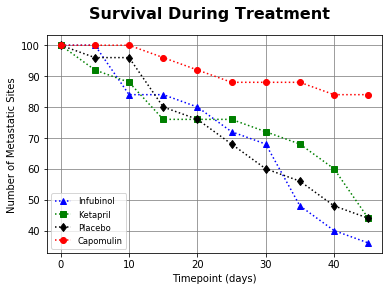

In [150]:
# Generate the Line Plot

fig, (ax3) = plt.subplots()

fig.suptitle("Survival During Treatment", fontsize=16, fontweight="bold")

ax3.plot(time, survival_plot_index.loc[:,"Infubinol"], marker = "^",color="blue",label="Infubinol", 
             linestyle = ":")

ax3.errorbar(time, survival_plot_index.loc[:,"Ketapril"], marker = "s",color="green",label="Ketapril", 
            linestyle = ":")

ax3.errorbar(time, survival_plot_index.loc[:,"Placebo"], marker = "d",color="black",label="Placebo", 
             linestyle = ":")

ax3.errorbar(time, survival_plot_index.loc[:,"Capomulin"], marker = "o",color="red",label="Capomulin", 
             linestyle = ":")

#ax3.plot(time, survival_plot_index.loc[:,"Ramicane"], marker = '*',color="palegreen",label="Ramicane", 
#            linestyle = ":")

#ax3.plot(time, survival_plot_index.loc[:,"Propriva"], marker = 'v',color="skyblue",label="Propriva", 
#            linestyle = ":")

#ax3.plot(time, survival_plot_index.loc[:,"Ceftamin"], marker = 'x',color="purple",label="Ceftamin", 
#            linestyle = ":")

#ax3.plot(time, survival_plot_index.loc[:,"Naftisol"], marker = 'h',color="slategrey",label="Naftisol", 
#             linestyle = ":")

#ax3.plot(time, survival_plot_index.loc[:,"Stelasyn"], marker = '+',color="olive",label="Stelasyn", 
#             linestyle = ":")

#ax3.plot(time, survival_plot_index.loc[:,"Zoniferol"], marker = 8,color="aqua",label="Zoniferol", 
#             linestyle = ":")


ax3.set_xlim(-2, max(plot_number_index["Timepoint"]+2))

ax3.set_xlabel("Timepoint (days)")

ax3.set_ylabel("Number of Metastatic Sites")

ax3.grid(axis = 'both',color='grey', linestyle='-', linewidth=0.75)

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the plot

plt.savefig("../Images/survival rates vs. timepoint.png")

# Show plot



plt.show()

In [177]:
# Print some conclusions on the data

print(f"1) Capomulin and Ramicane double the survival rates of other drugs and placebo after 45 days of treatment: 80+%")
print("")
print(f"2) For the other drugs, survival rates ranged up to 60%+ for 30 days. Then, the survival rate decreases")
print(f"significantly, likely a tocixity effect of the treatment. A good example is Infubimisol as shown in the chart above")

1) Capomulin and Ramicane double the survival rates of other drugs and placebo after 45 days of treatment: 80+%

2) For the other drugs, survival rates ranged up to 60%+ for 30 days. Then, the survival rate decreases
significantly, likely a tocixity effect of the treatment. A good example is Infubimisol as shown in the chart above


## Summary Bar Graph

In [152]:
# Preview DataFrame

tumor_response_index.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [153]:
# Creating a dataframe with the initial tumor size (mm3) (at timepoint = 0)

filter_tumor0_response = tumor_response_index.loc[mouse_number_index["Timepoint"] == 0 , :]

# Droping timepoint column

filter_tumor0_response = filter_tumor0_response.drop(columns=['Timepoint'])


filter_tumor0_response.head()

,Drug,Tumor Volume (mm3)
0,Capomulin,45.0
10,Ceftamin,45.0
20,Infubinol,45.0
30,Ketapril,45.0
40,Naftisol,45.0


In [154]:
# Creating a dataframe with the final tumor size (mm3) (at timepoint = 45)

filter_tumor45_response = tumor_response_index.loc[mouse_number_index["Timepoint"] == 45 , :]

# Droping timepoint column

filter_tumor45_response = filter_tumor45_response.drop(columns=['Timepoint'])

filter_tumor45_response.head()

,Drug,Tumor Volume (mm3)
9,Capomulin,36.236114
19,Ceftamin,64.132421
29,Infubinol,65.755562
39,Ketapril,70.662958
49,Naftisol,69.265506


In [155]:
# Merge the dataframes and add a column with the calculated rates of survival by drug and timepoint

tumor_change = pd.merge(filter_tumor0_response, filter_tumor45_response, on="Drug")



# Relabeling the imported columns for tumor size column

tumor_change = tumor_change.rename(columns= {'Tumor Volume (mm3)_x': 'Initial Tumor Size (mm3)', 'Tumor Volume (mm3)_y': 
                                             'Final Tumor Size (mm3)'})

#Adding a column with the calculation of percentage of change during treatment

tumor_change["Percentage Change"] = (tumor_change['Final Tumor Size (mm3)'] / 
                                       tumor_change['Initial Tumor Size (mm3)'])-1

tumor_change

,Drug,Initial Tumor Size (mm3),Final Tumor Size (mm3),Percentage Change
0,Capomulin,45.0,36.236114,-0.194753
1,Ceftamin,45.0,64.132421,0.425165
2,Infubinol,45.0,65.755562,0.461235
3,Ketapril,45.0,70.662958,0.570288
4,Naftisol,45.0,69.265506,0.539233
5,Placebo,45.0,68.084082,0.512980
6,Propriva,45.0,66.258529,0.472412
7,Ramicane,45.0,34.955595,-0.223209
8,Stelasyn,45.0,68.438310,0.520851
9,Zoniferol,45.0,65.960888,0.465798


In [156]:
# Store all Relevant Percent Changes into a Tuple

change_tuple = tumor_change[['Drug', 'Percentage Change']]
change_tuple = [tuple(x) for x in change_tuple.values]

change_tuple

[('Capomulin', -0.19475302667894168),
 ('Ceftamin', 0.4251649185589741),
 ('Infubinol', 0.4612347172785185),
 ('Ketapril', 0.5702879468660607),
 ('Naftisol', 0.5392334713476923),
 ('Placebo', 0.512979604831515),
 ('Propriva', 0.4724117486320636),
 ('Ramicane', -0.22320900462766657),
 ('Stelasyn', 0.5208513428789896),
 ('Zoniferol', 0.4657975086509525)]

In [157]:
# Splice the data between passing and failing drugs

# Droping tumor size columns (initla and final) column

tumor_change = tumor_change.drop(columns=['Initial Tumor Size (mm3)', 'Final Tumor Size (mm3)'])
                                                       
tumor_change                                                     

,Drug,Percentage Change
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Ketapril,0.570288
4,Naftisol,0.539233
5,Placebo,0.512980
6,Propriva,0.472412
7,Ramicane,-0.223209
8,Stelasyn,0.520851
9,Zoniferol,0.465798


In [158]:
# Creating a new column to assess if the drug if passing or failing pending on the % of change

tumor_change['Rating'] = tumor_change['Percentage Change']

tumor_change.loc[tumor_change['Percentage Change'] < 0, 'Rating'] = "Passing"
tumor_change.loc[tumor_change['Percentage Change'] > 0, 'Rating'] = "Failing"

# Groping by passing/failing

grouped_tumor_change = pd.DataFrame(tumor_change.groupby(["Rating", "Drug"]) ["Percentage Change"].sum())

grouped_tumor_change

Percentage Change
Rating  Drug                        
Failing Ceftamin            0.425165
        Infubinol           0.461235
        Ketapril            0.570288
        Naftisol            0.539233
        Placebo             0.512980
        Propriva            0.472412
        Stelasyn            0.520851
        Zoniferol           0.465798
Passing Capomulin          -0.194753
        Ramicane           -0.223209

In [159]:
# Reset index to pivot table for rating of drug treatments

tumor_change_index = grouped_tumor_change.reset_index(drop = False)


tumor_change_index

,Rating,Drug,Percentage Change
0,Failing,Ceftamin,0.425165
1,Failing,Infubinol,0.461235
2,Failing,Ketapril,0.570288
3,Failing,Naftisol,0.539233
4,Failing,Placebo,0.512980
5,Failing,Propriva,0.472412
6,Failing,Stelasyn,0.520851
7,Failing,Zoniferol,0.465798
8,Passing,Capomulin,-0.194753
9,Passing,Ramicane,-0.223209


In [160]:
# Defining y axis values for the bar chart - create a list from the dataframe file

y_axis = tumor_change_index["Percentage Change"]

y_axis

0    0.425165
1    0.461235
2    0.570288
3    0.539233
4    0.512980
5    0.472412
6    0.520851
7    0.465798
8   -0.194753
9   -0.223209
Name: Percentage Change, dtype: float64

In [161]:
# Defining x axis values for the bar chart - create a list from the dataframe file

x_axis = tumor_change_index["Drug"].values

x_axis

array(['Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Stelasyn', 'Zoniferol', 'Capomulin', 'Ramicane'],
      dtype=object)

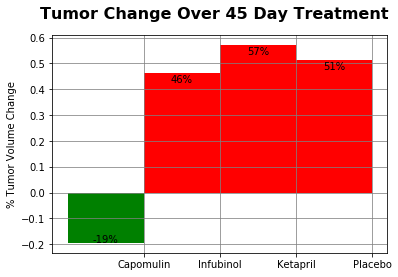

In [168]:
# Creating the bar chart

fig, (ax4) = plt.subplots()

fig.suptitle("Tumor Change Over 45 Day Treatment", fontsize=16, fontweight="bold")


ax4.bar(x_axis[8], y_axis[8],color="green", width = -1.0, align="edge")

ax4.bar(x_axis[1], y_axis[1],color="red", width = -1.0, align="edge")

ax4.bar(x_axis[2], y_axis[2],color="red", width = -1.0, align="edge")

ax4.bar(x_axis[4], y_axis[4],color="red", width = -1.0, align="edge")

#ax4.bar(x_axis[0], y_axis[0],color="red", width = -1.0, align="edge")

#ax4.bar(x_axis[3], y_axis[3],color="red", width = -1.0, align="edge")

#ax4.bar(x_axis[5], y_axis[5],color="red", width = -1.0, align="edge")

#ax4.bar(x_axis[6], y_axis[6],color="red", width = -1.0, align="edge")

#ax4.bar(x_axis[7], y_axis[7],color="red", width = -1.0, align="edge")

#ax4.bar(x_axis[9], y_axis[9],color="green", width = -1.0, align="edge")


ax4.grid(axis = 'both',color='grey', linestyle='-', linewidth=0.75)


# Plot the figure.
#plt.figure(figsize=(12, 8))

ax4.set_ylabel('% Tumor Volume Change')
#ax4.set_xticklabels(x_labels)

#Creating a function to put add labels to the bars with the value sof % of tumor volume changes by dru
# Taken from https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax4.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        

            
        # Vertical alignment for positive values
        # If value of bar is positive: Place label inside at the top of the bar
        if y_value > 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'center_baseline'

        # If value of bar is negative: Place label inside at the bottom of the bar
        if y_value < 10:
            # Invert space to place label below
            space *= 1
            # Vertically align label at top
            va = 'center_baseline'

        # Use Y value as label and format number with one decimal place
        label = "{:.0%}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax4)


# Save the plot

plt.savefig("../Images/Percentage of Tumor Change by Drug.png")

In [125]:
# Show plot

plt.show()

In [176]:
# Print some conclusions on the data

print(f"1) Most drugs  show that they have a positive effect in decreasing the number of metastatic and tumor volume")
print(f"after 45 days in comparison to the placebo")
print("")
print(f"1) Capomulin and Ramicane seem to show the most positive effects: drastic redection of tumor volume")
print(f"and number metastatic sites, as well as double the survival rate")
print("")
print("3) For the other drugs, survival rates ranged up to 60%+ for 30 days. Then, the survival rate decreases")
print(f"significantly, likely a tocixity effect of the treatment. A good example is Infubimisol as shown in the survival chart")


1) Most drugs  show that they have a positive effect in decreasing the number of metastatic and tumor volume
after 45 days in comparison to the placebo

1) Capomulin and Ramicane seem to show the most positive effects: drastic redection of tumor volume
and number metastatic sites, as well as double the survival rate

3) For the other drugs, survival rates ranged up to 60%+ for 30 days. Then, the survival rate decreases
significantly, likely a tocixity effect of the treatment. A good example is Infubimisol as shown in the survival chart
